In [154]:
    import requests
    import pandas as pd
    from bs4 import BeautifulSoup
    from html.parser import HTMLParser
    import numpy as np
    import matplotlib.pyplot as plt
    %matplotlib inline
    import folium
    # Matplotlib and associated plotting modules
    import matplotlib.cm as cm
    import matplotlib.colors as colors

In [155]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

In [156]:
website_url = requests.get(url).text

In [157]:
soup = BeautifulSoup(website_url,'lxml')
#print(soup.prettify())

In [158]:
data = []
table = soup.find('table', attrs={'class':'wikitable sortable'})
table_body = table.find('tbody')

rows = table_body.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele]) # Get rid of empty values

In [159]:
L=["Postal Code", "Borough", "Neighbourhood"]

In [160]:
df=pd.DataFrame(data, columns=L)
df = df.drop([0], axis=0) 

In [161]:
dff=df[df.Borough!= 'Not assigned']

In [162]:
dff = dff.reset_index()
del dff['index']

In [163]:
dff.shape

(212, 3)

In [164]:
coordinates = pd.read_csv("Geospatial_Coordinates.csv") 

In [165]:
coordinates.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [166]:
merged=pd.merge(dff, coordinates, on='Postal Code')
#merged

In [167]:
def tmp(group_series):
    if (group_series==group_series.iloc[0]).all():
        return group_series.iloc[0]
    else:
        return group_series.sum()
table=merged.groupby('Postal Code').agg(tmp)

table.reset_index()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,RougeMalvern,43.806686,-79.194353
1,M1C,Scarborough,Highland CreekRouge HillPort Union,43.784535,-79.160497
2,M1E,Scarborough,GuildwoodMorningsideWest Hill,43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,East Birchmount ParkIonviewKennedy Park,43.727929,-79.262029
7,M1L,Scarborough,ClairleaGolden MileOakridge,43.711112,-79.284577
8,M1M,Scarborough,CliffcrestCliffsideScarborough Village West,43.716316,-79.239476
9,M1N,Scarborough,Birch CliffCliffside West,43.692657,-79.264848


In [168]:
table2=table[table['Borough'].str.contains('Toronto')]
table2.reset_index()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,The Danforth WestRiverdale,43.679557,-79.352188
2,M4L,East Toronto,The Beaches WestIndia Bazaar,43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
5,M4P,Central Toronto,Davisville North,43.712751,-79.390197
6,M4R,Central Toronto,North Toronto West,43.715383,-79.405678
7,M4S,Central Toronto,Davisville,43.704324,-79.388790
8,M4T,Central Toronto,Moore ParkSummerhill East,43.689574,-79.383160
9,M4V,Central Toronto,Deer ParkForest Hill SERathnellySouth HillSumm...,43.686412,-79.400049


In [169]:
def get_category_type(row):
    try:
        categories_list = row['toronto']
    except:
        categories_list = row['venue.toronto']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [170]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [171]:
# set number of clusters
kclusters = 5

tab2 = table2.drop(['Neighbourhood','Borough'],axis=1).reset_index()
toronto_clustering = tab2.drop(['Postal Code'],axis=1)
toronto_clustering

,Latitude,Longitude
0,43.676357,-79.293031
1,43.679557,-79.352188
2,43.668999,-79.315572
3,43.659526,-79.340923
4,43.728020,-79.388790
5,43.712751,-79.390197
6,43.715383,-79.405678
7,43.704324,-79.388790
8,43.689574,-79.383160
9,43.686412,-79.400049


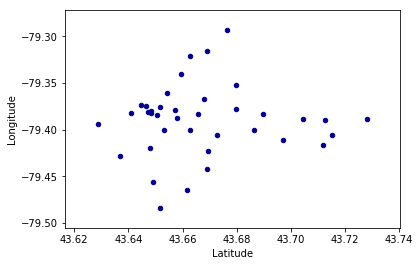

In [172]:
toronto_clustering.plot.scatter(x='Latitude', y='Longitude', c='DarkBlue')
plt.show()

In [173]:
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_clustering)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [174]:
centers=kmeans.cluster_centers_
centers


array([[ 43.65715448, -79.41271363],
       [ 43.70563855, -79.39811351],
       [ 43.65264011, -79.37888691],
       [ 43.66943648, -79.32465436],
       [ 43.65778592, -79.46194938]])

In [175]:
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 3, 3, 3, 1, 1, 1, 1, 1, 1])

In [176]:
tb=table2.reset_index()

In [177]:
tb2=tb.drop(['Postal Code'],axis=1)
tb2

,Borough,Neighbourhood,Latitude,Longitude
0,East Toronto,The Beaches,43.676357,-79.293031
1,East Toronto,The Danforth WestRiverdale,43.679557,-79.352188
2,East Toronto,The Beaches WestIndia Bazaar,43.668999,-79.315572
3,East Toronto,Studio District,43.659526,-79.340923
4,Central Toronto,Lawrence Park,43.728020,-79.388790
5,Central Toronto,Davisville North,43.712751,-79.390197
6,Central Toronto,North Toronto West,43.715383,-79.405678
7,Central Toronto,Davisville,43.704324,-79.388790
8,Central Toronto,Moore ParkSummerhill East,43.689574,-79.383160
9,Central Toronto,Deer ParkForest Hill SERathnellySouth HillSumm...,43.686412,-79.400049


In [178]:
latitude = 43.761539
longitude = -79.411079
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.761539, -79.411079.


In [181]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(tb2['Latitude'],tb2['Longitude'], tb2['Neighborhood'], tb2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup
        =label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

ValueError: not enough values to unpack (expected 4, got 2)